## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('student-por.csv')

## EDA

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## Data distribution

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns
cate_cols = df.select_dtypes(include='object').columns

In [9]:
numerical_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'AVG_G1_G2'],
      dtype='object')

In [10]:
cate_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Categorical data distribution

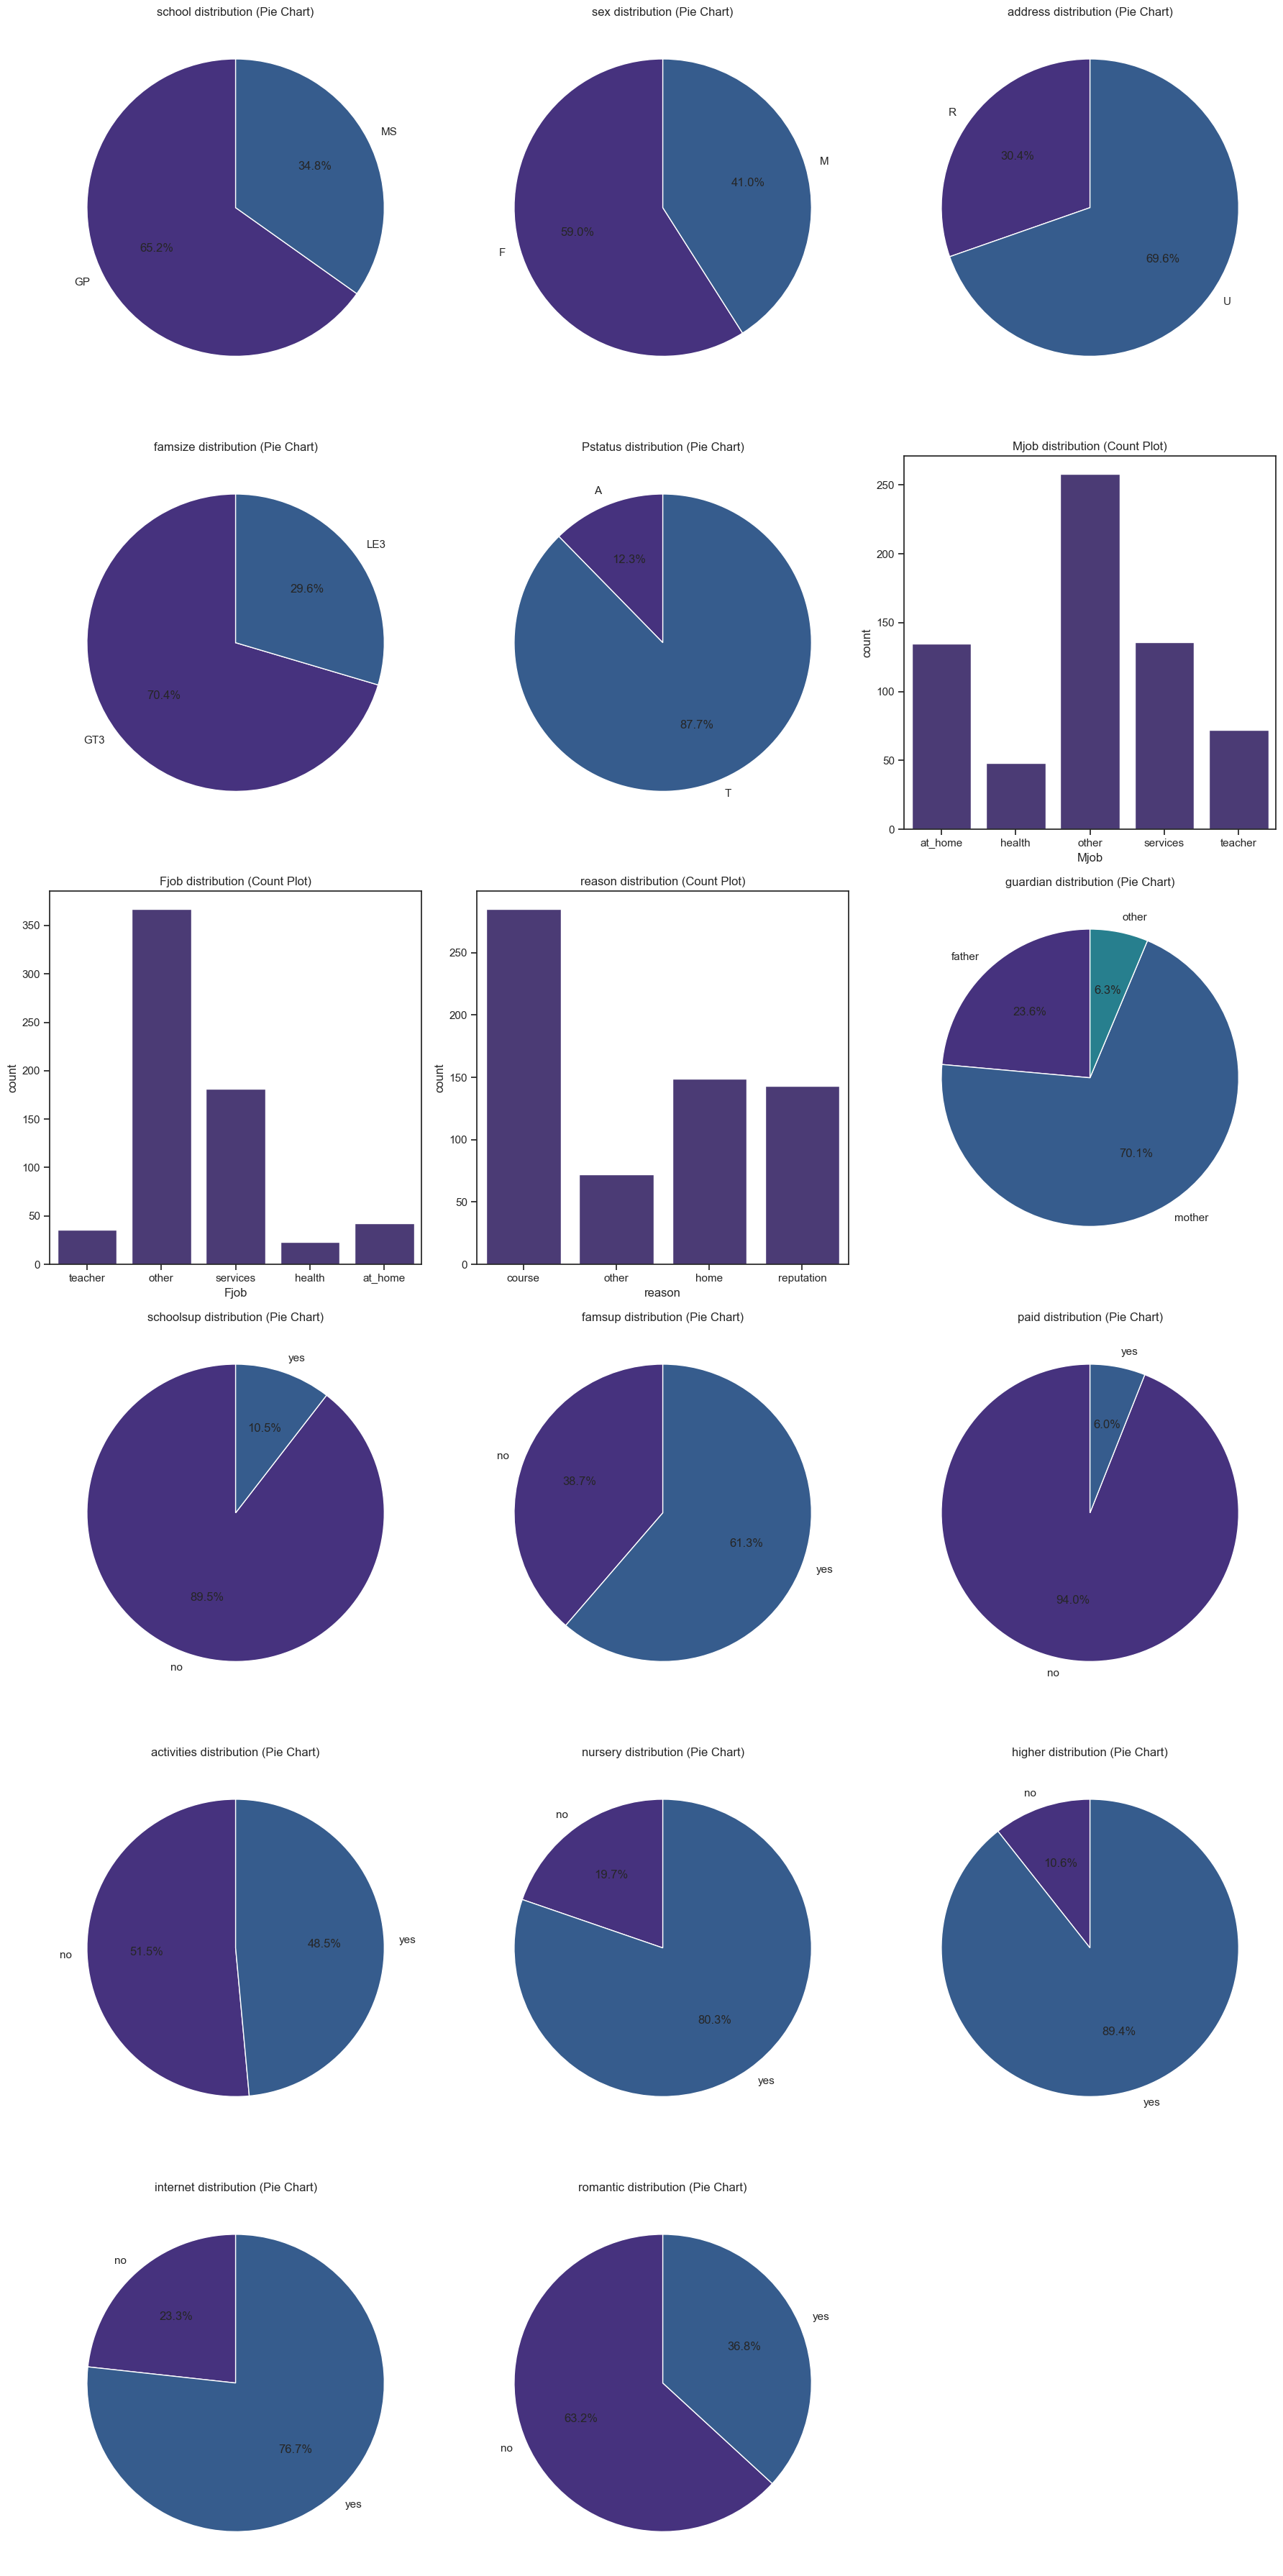

In [11]:
plt.rcParams["font.family"] = "monospace"
sns.set_theme(style='ticks', palette='viridis')


# Count the number of subplots needed
num_cols = len(cate_cols)
rows = (num_cols + 2) // 3  # This calculates how many rows we need (3 plots per row)

fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))  # Create subplots grid
axes = axes.flatten()  # Flatten the 2D axes array to 1D for easy iteration

for idx, col in enumerate(cate_cols):
    ax = axes[idx]  # Pick the appropriate axis for the current plot
    unique_values_count = df[col].nunique()  # Get the number of unique values in the column
    
    if unique_values_count <= 3:
        # Plot a pie chart if unique values are <= 3
        vals = df[col].values
        unique_values, counts = np.unique(vals, return_counts=True)
        
        ax.pie(counts, labels=unique_values, autopct='%1.1f%%', startangle=90)
        ax.set_facecolor('black')  # Set background color for pie chart
        ax.set_title(f"{col} distribution (Pie Chart)")

    else:
        # Plot a count plot if unique values are > 3
        sns.countplot(x=col, data=df, ax=ax)
        ax.set_title(f"{col} distribution (Count Plot)")

# Remove any empty subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Numerical data distribution

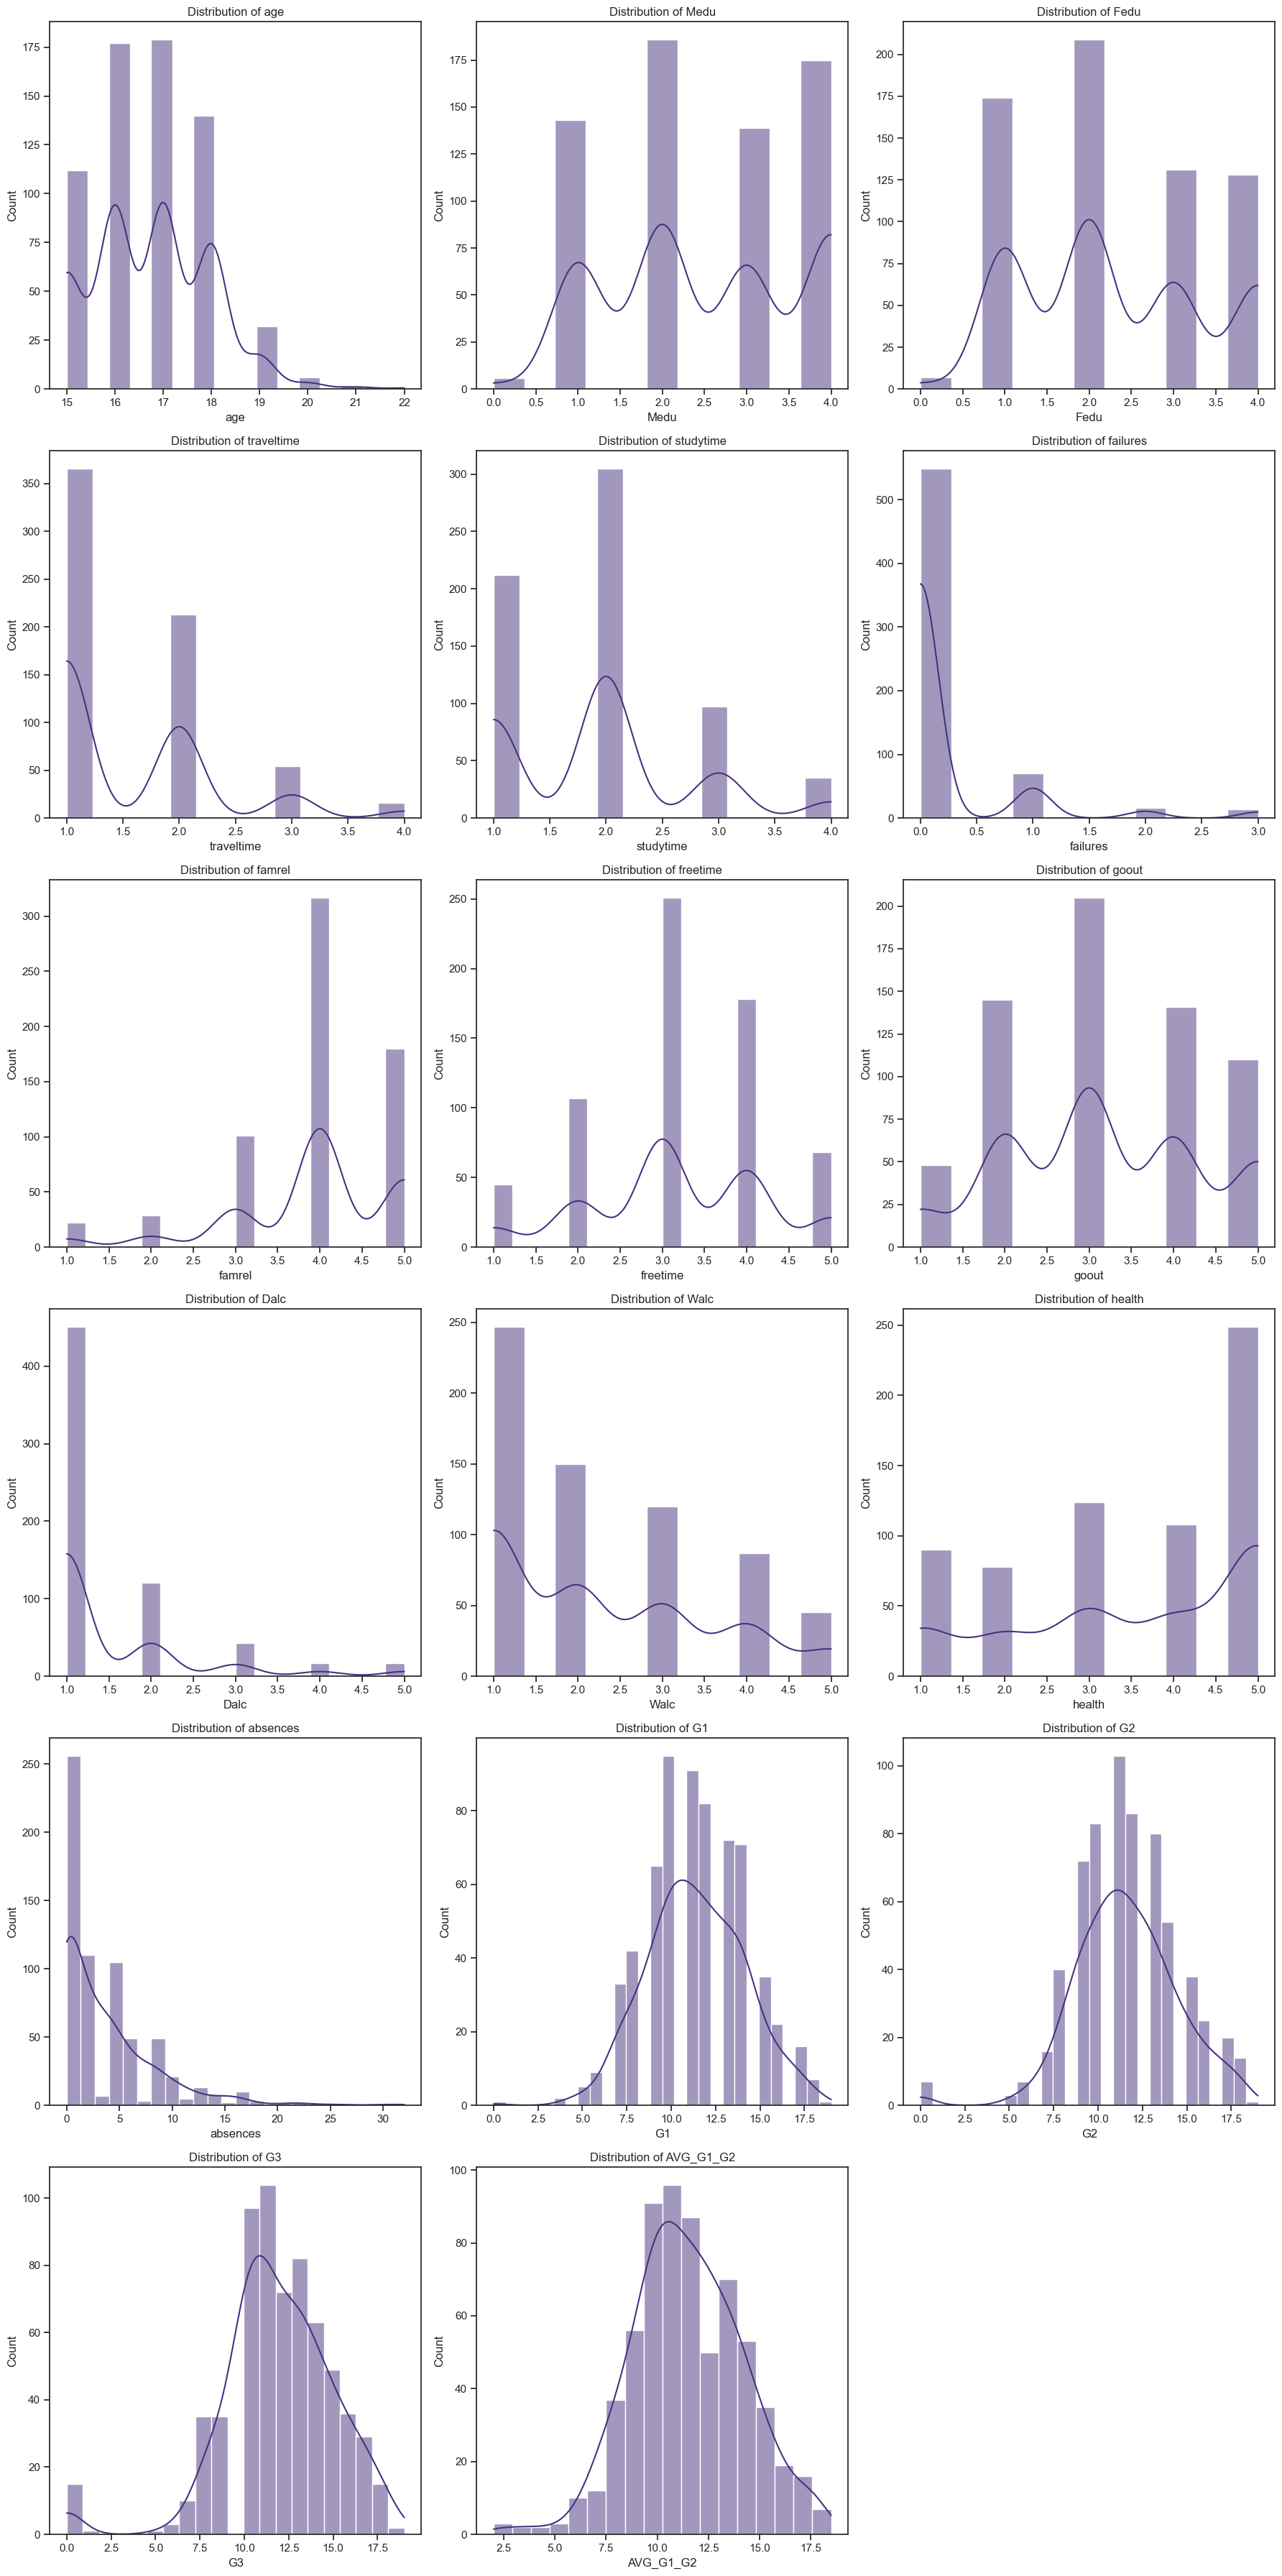

In [12]:
# Count the number of subplots needed
num_cols_len = len(numerical_cols)
rows = (num_cols_len + 2) // 3  # This calculates how many rows we need (3 plots per row)

fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))  # Create subplots grid
axes = axes.flatten()  # Flatten the 2D axes array to 1D for easy iteration

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]  # Pick the appropriate axis for the current plot

    # Use histplot to plot directly on the provided ax
    sns.histplot(df[col], kde=True, ax=ax)  # kde=True to plot a histogram with KDE
    ax.set_title(f"Distribution of {col}")

# Remove any empty subplots if there are fewer than (rows * 3)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


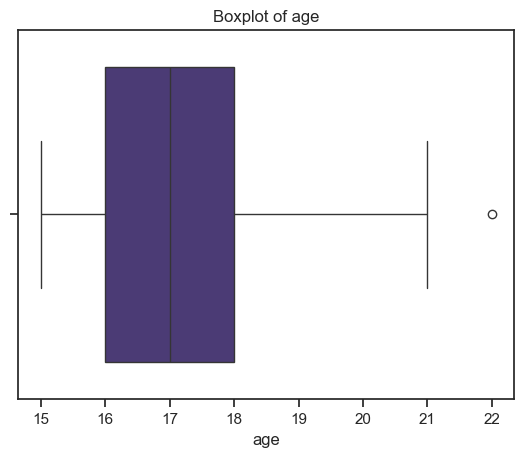

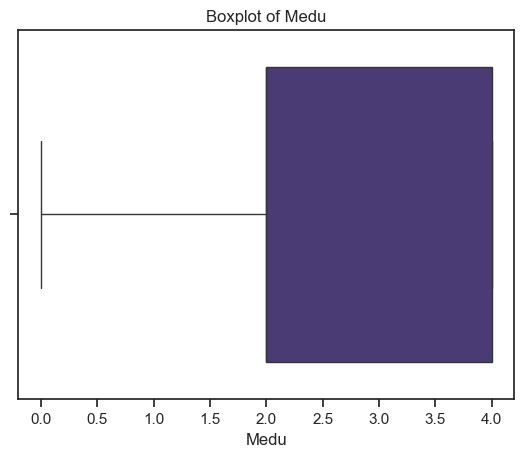

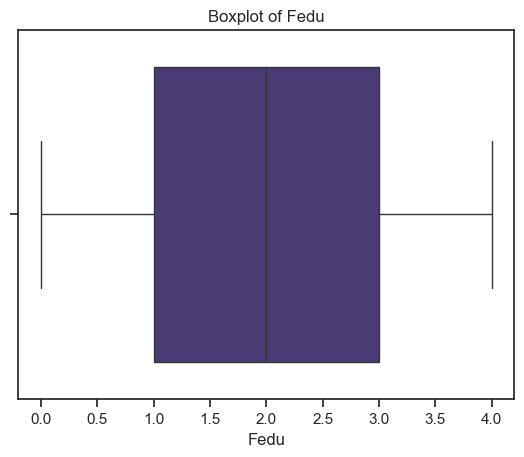

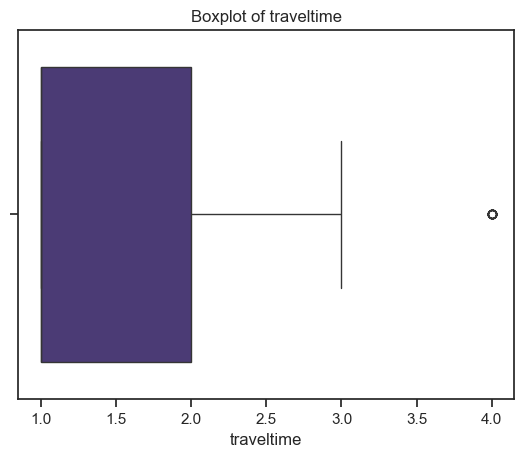

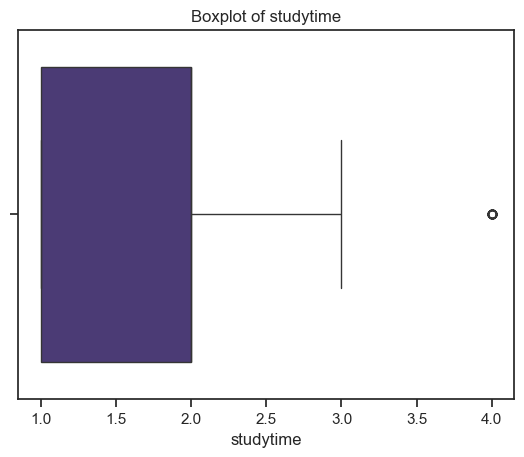

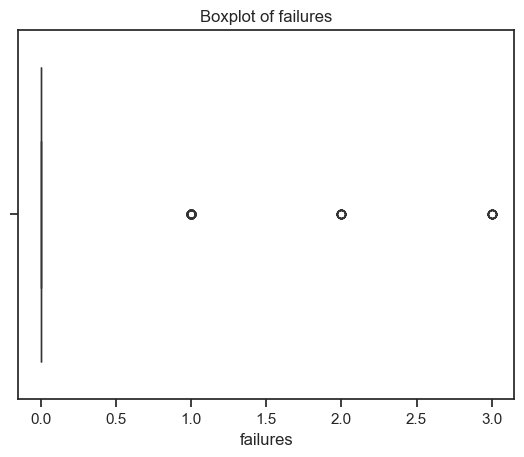

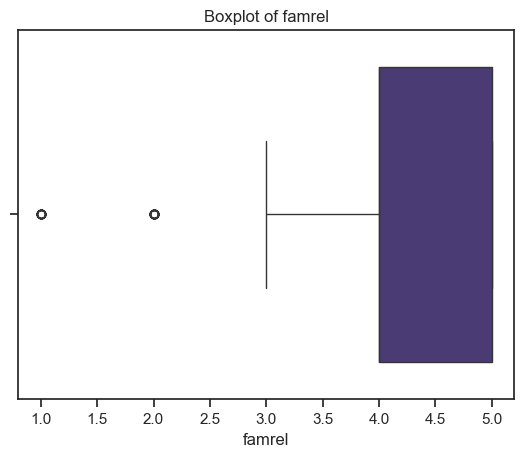

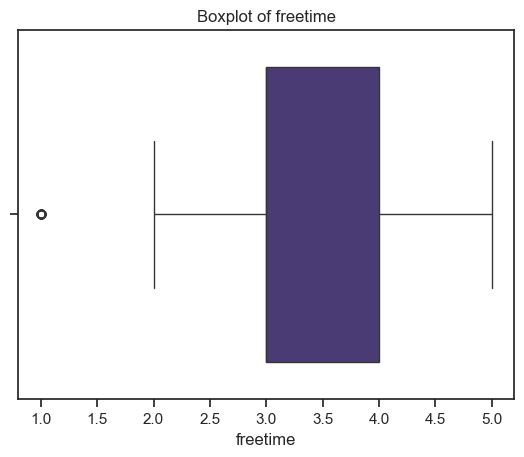

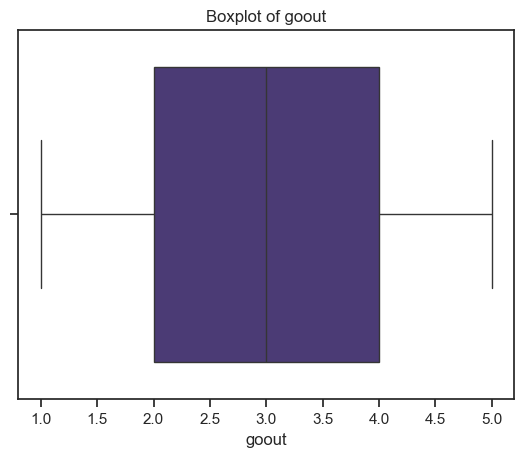

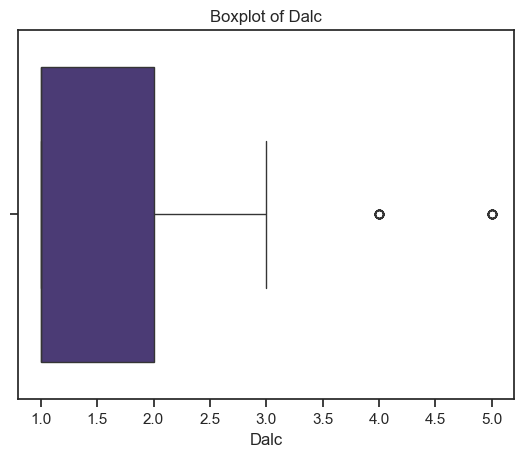

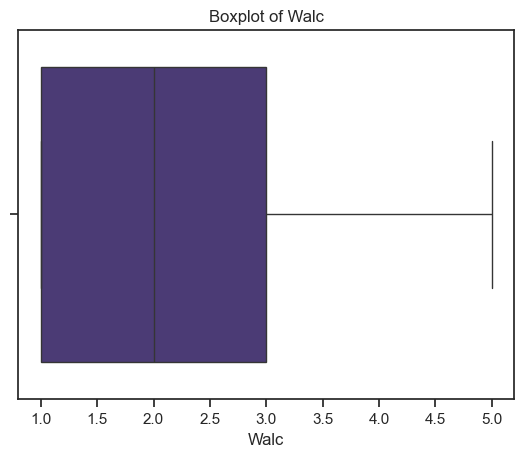

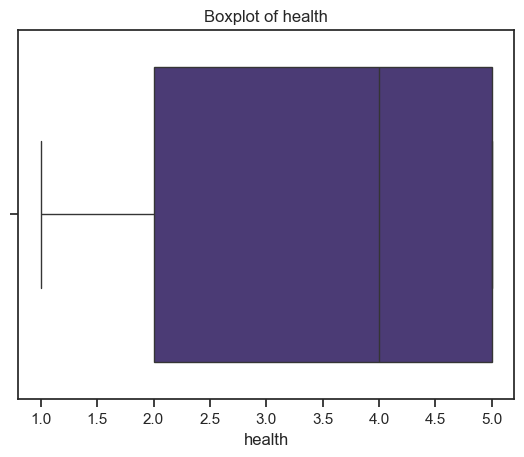

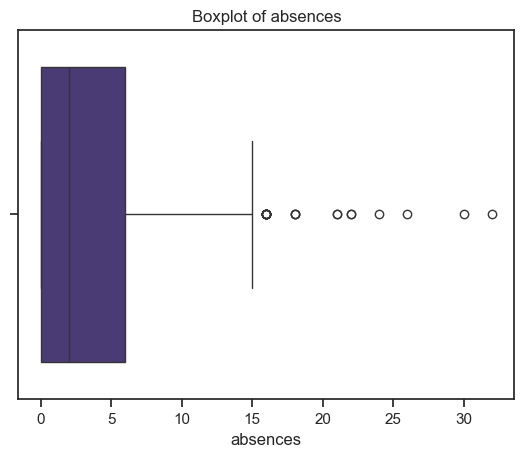

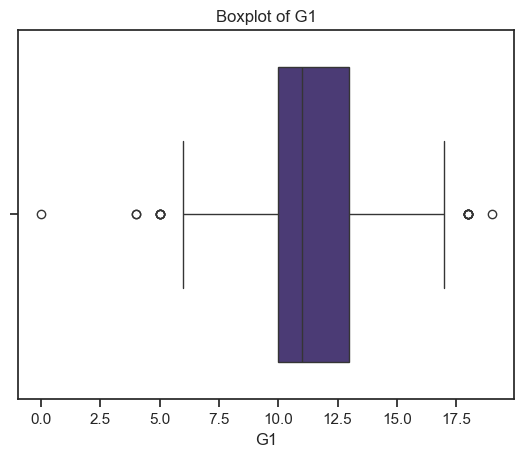

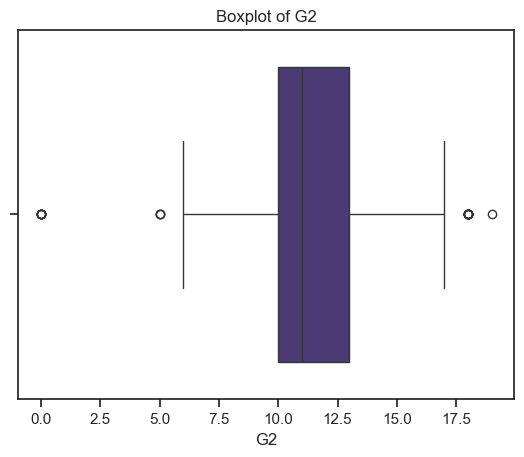

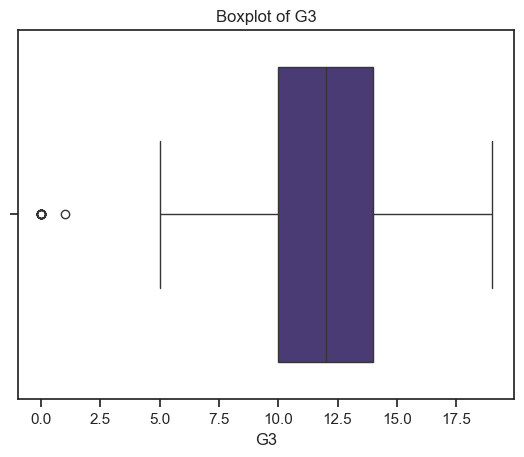

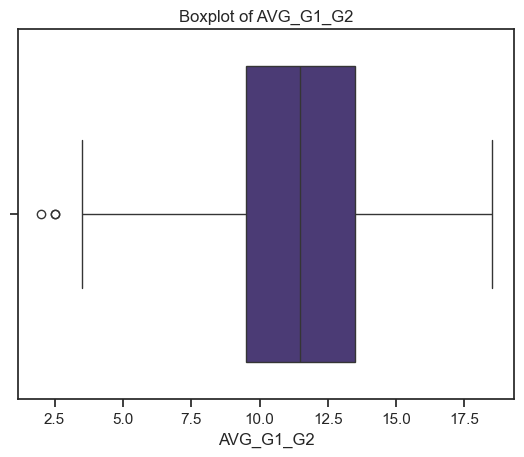

In [13]:
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## Absence Vs Grade

<Axes: xlabel='absences', ylabel='G3'>

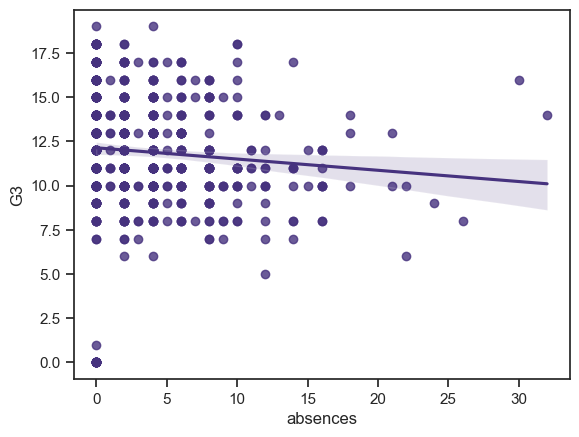

In [14]:
sns.regplot(x='absences', y='G3', data=df)

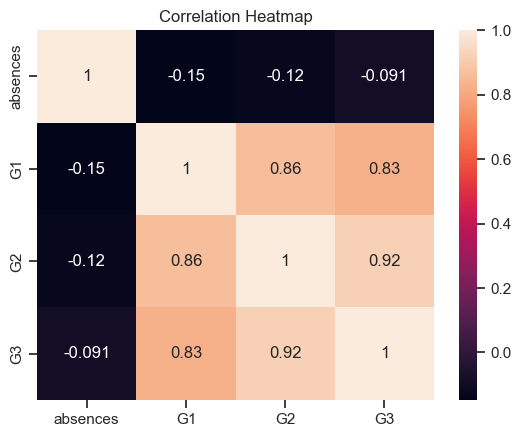

In [15]:
sns.heatmap(df[['absences', 'G1', 'G2', 'G3']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

## Age Vs Grade

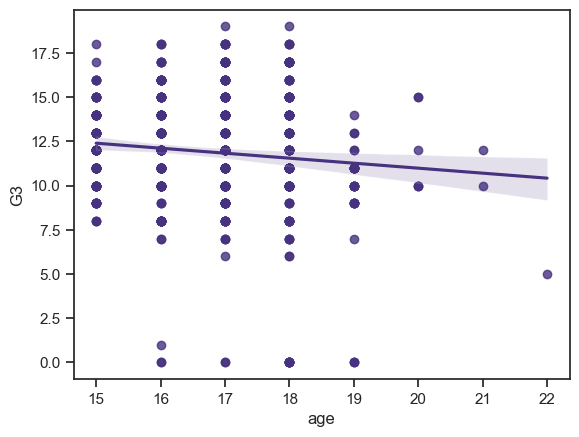

In [16]:
sns.regplot(x='age', y='G3', data=df)
plt.show()

In [17]:
age_grade = df.groupby("age").aggregate({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})
age_grade.reset_index(inplace=True)
age_grade

,age,G1,G2,G3
0,15,11.758929,11.830357,12.107143
1,16,11.723164,11.638418,11.994350
2,17,11.519553,11.849162,12.268156
3,18,11.200000,11.450000,11.771429
4,19,9.031250,9.312500,9.531250
5,20,10.333333,12.000000,12.000000
6,21,9.000000,11.000000,11.000000
7,22,7.000000,8.000000,5.000000


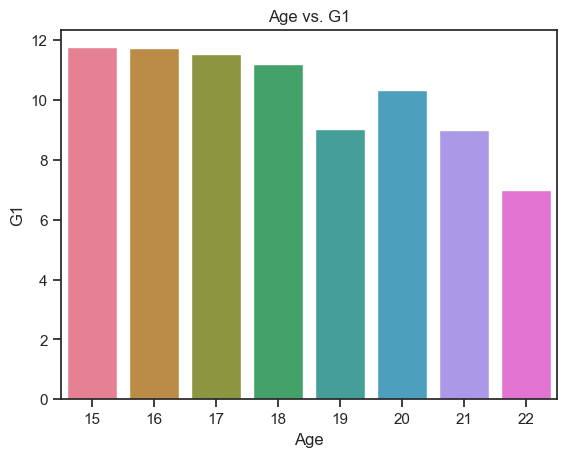

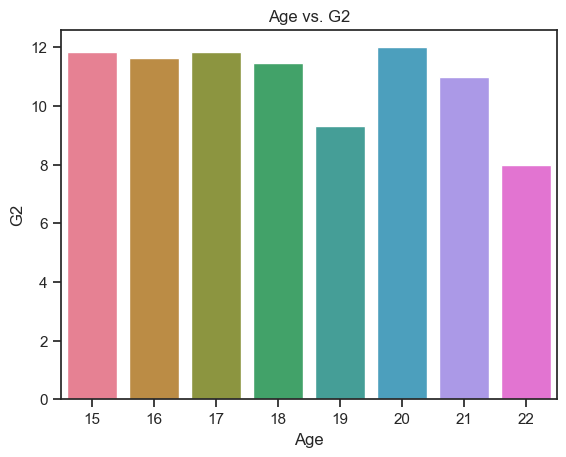

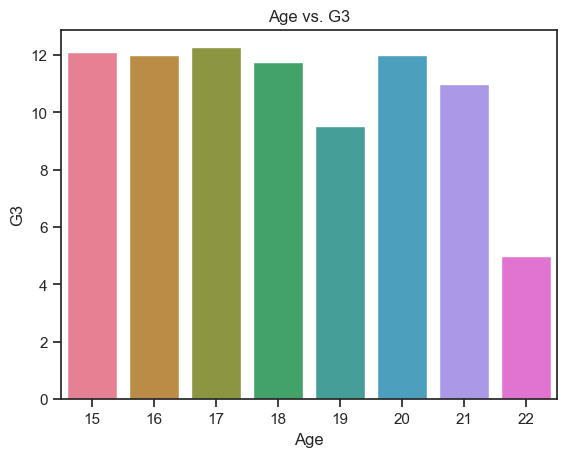

In [18]:
grades = ['G1', 'G2', 'G3']

for grade in grades:
    sns.barplot(data=age_grade, x='age', y=grade, palette='husl').set(xlabel='Age', ylabel=grade, title=f'Age vs. {grade}')
    plt.show()

## Mother's Job and Education

In [19]:
MotherJop_Edu = df.groupby("Mjob").aggregate({"Medu": "mean"})
MotherJop_Edu.reset_index(inplace=True)
MotherJop_Edu.sort_values(by='Medu', ascending=False, inplace=True)

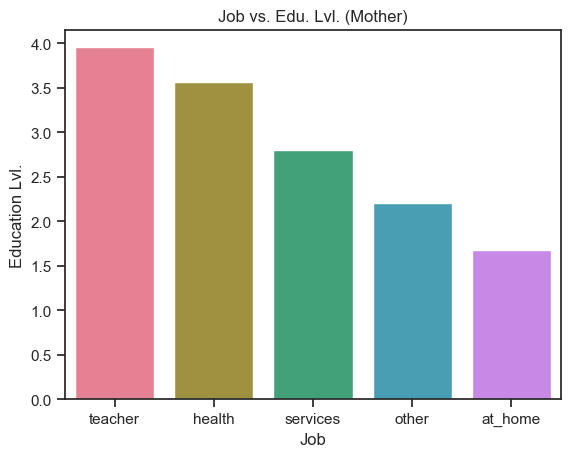

In [20]:
sns.barplot(x='Mjob', y='Medu', data=MotherJop_Edu , palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Mother)')
plt.show()

## Father's job & education

In [21]:
FatherJop_Edu = df.groupby("Fjob").aggregate({"Fedu": "mean"})
FatherJop_Edu.reset_index(inplace=True)
FatherJop_Edu.sort_values(by='Fedu', ascending=False, inplace=True)

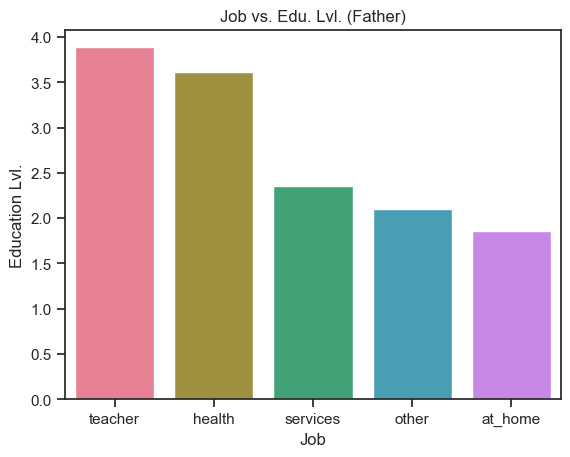

In [22]:
sns.barplot(x='Fjob', y='Fedu', data=FatherJop_Edu ,palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Father)')
plt.show()

## Activites Vs Grades

In [23]:
act_gr = df.groupby("activities").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
act_gr

,activities,G1,G2,G3
0,no,11.185629,11.380240,11.718563
1,yes,11.625397,11.771429,12.104762


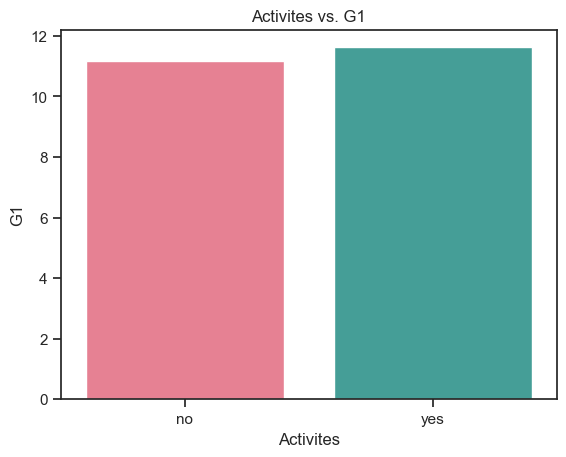

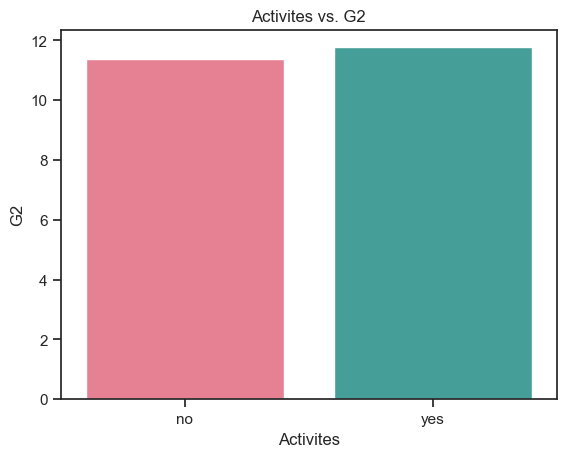

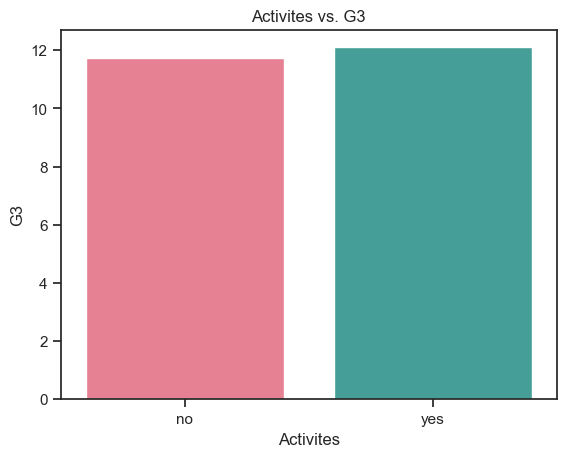

In [24]:
for grade in grades:
    sns.barplot(data=act_gr, x='activities', y=grade, palette='husl').set(xlabel='Activites', ylabel=grade, title=f'Activites vs. {grade}');
    plt.show()

## Go out Vs Grades

In [25]:
out_gr = df.groupby("goout").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
out_gr

,goout,G1,G2,G3
0,1,10.416667,10.437500,10.729167
1,2,12.013793,12.324138,12.668966
2,3,11.634146,11.746341,12.151220
3,4,11.255319,11.524823,11.971631
4,5,10.763636,10.800000,10.872727


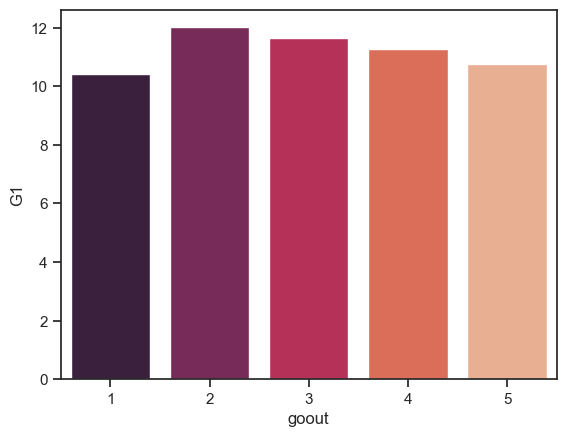

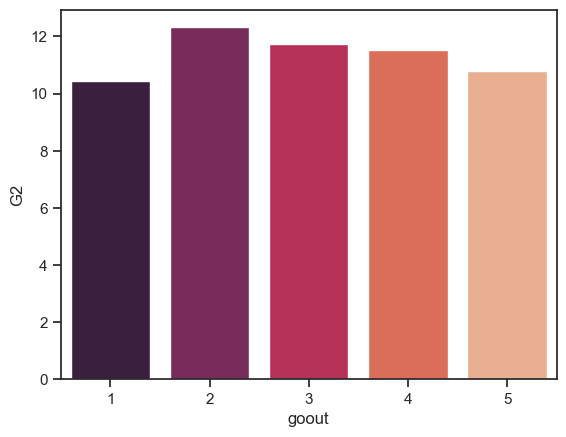

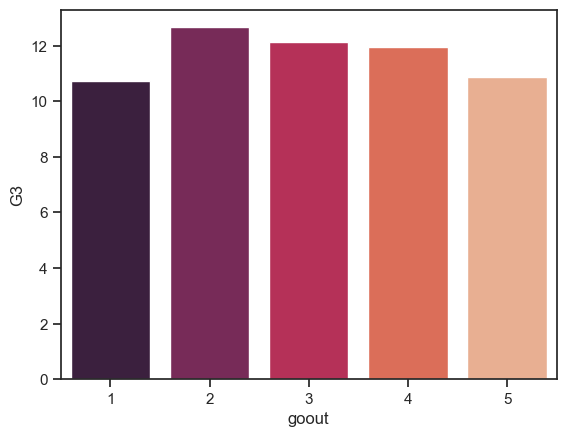

In [26]:
for grade in grades:
    sns.barplot(data=out_gr, x='goout', y=grade, palette='rocket')
    plt.show()

In [27]:
lr = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [28]:
for col in cate_cols:
    df[col] = lr.fit_transform(df[col])

In [29]:
np.abs(stats.zscore(df))
np.abs(stats.zscore(df)).shape
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,AVG_G1_G2
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,10.0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,12.5
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,14.0
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,12.0
5,0,1,16,1,1,1,4,3,3,2,...,4,2,1,2,5,6,12,12,13,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,1,0,18,0,0,1,4,4,4,0,...,4,3,2,2,5,4,7,9,10,8.0
644,1,0,19,0,0,1,2,3,3,2,...,4,2,1,2,5,4,10,11,10,10.5
645,1,0,18,1,1,1,3,1,4,3,...,3,4,1,1,1,4,15,15,16,15.0
647,1,1,17,1,1,1,3,1,3,3,...,4,5,3,4,2,6,10,10,10,10.0


In [54]:
df.corr()['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.948911
AVG_G1_G2     0.942646
G1            0.884183
higher        0.313747
studytime     0.300097
Medu          0.284191
Fedu          0.199591
Mjob          0.154231
reason        0.139558
address       0.123860
activities    0.112341
Fjob          0.094434
internet      0.086509
famrel        0.073554
nursery       0.057617
famsup        0.015126
age           0.014749
famsize       0.006093
Pstatus      -0.007622
guardian     -0.063882
romantic     -0.067836
goout        -0.074575
sex          -0.085775
freetime     -0.087211
traveltime   -0.105075
health       -0.111272
schoolsup    -0.113733
Walc         -0.158764
Dalc         -0.159119
absences     -0.192123
school       -0.215067
failures     -0.376414
paid               NaN
Name: G3, dtype: float64

## Making the Model

In [31]:
X = df.drop(columns='G3' ,axis=1)
y = df['G3']

In [32]:
X.shape, y.shape

((528, 33), (528,))

In [33]:
all_features = X.columns
all_features

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'AVG_G1_G2'],
      dtype='object')

In [34]:
dtc = DecisionTreeClassifier(random_state=0, criterion='entropy') 
selector = SelectFromModel(dtc)
selector.fit(X, y)

SelectFromModel(estimator=DecisionTreeClassifier(criterion='entropy',
                                                 random_state=0))

In [35]:
selector.get_support(indices=True)

array([24, 31, 32], dtype=int64)

In [36]:
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([24, 31, 32], dtype=int64)

In [37]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['freetime', 'G2', 'AVG_G1_G2'], dtype='object')

In [38]:
X = X[selected_features]

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Moelds

In [41]:
param_grid = {'fit_intercept': [True, False],
              'n_jobs' : [1, -1]}
grid = GridSearchCV(LinearRegression(),param_grid,cv = 5)
grid.fit(X_train,y_train)
grid.best_params_

{'fit_intercept': True, 'n_jobs': 1}

In [42]:
linear_best_estimator = grid.best_estimator_

In [43]:
test_pred = linear_best_estimator.predict(X_test)
train_pred = linear_best_estimator.predict(X_train)

In [44]:
mse = mean_squared_error(y_test, test_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, test_pred)

print("Optimaized LR Mean Squared Error MSE:", mse)
print("Optimaized LR Root Mean Squared Error RMSE:", rmse)
print("Optimaized LR R^2 Score:", r2)

Optimaized LR Mean Squared Error MSE: 0.5035056935754977
Optimaized LR Root Mean Squared Error RMSE: 0.7095813509214414
Optimaized LR R^2 Score: 0.9104900010598334


In [45]:
las = Lasso()
param_grid = {'alpha': [0.1, 0.5, 1, 2, 5, 10],
              'fit_intercept': [True, False],
              'selection': ['cyclic', 'random']}
grid = GridSearchCV(las,param_grid,cv = 5)
grid.fit(X_train,y_train)
grid.best_params_
las_best_estimator = grid.best_estimator_


In [46]:
las_test_pred = las_best_estimator.predict(X_test)
las_train_pred = las_best_estimator.predict(X_train)

In [47]:
mse = mean_squared_error(y_test, las_test_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, las_test_pred)

print("Optimaized Lasso Mean Squared Error MSE:", mse)
print("Optimaized Lasso Root Mean Squared Error RMSE:", rmse)
print("Optimaized Lasso R^2 Score:", r2)

Optimaized Lasso Mean Squared Error MSE: 0.4959083756651772
Optimaized Lasso Root Mean Squared Error RMSE: 0.7042076225554345
Optimaized Lasso R^2 Score: 0.9118406033008365


In [48]:
rid = Ridge()
param_grid = {'alpha': [0.1, 0.5, 1, 2, 5, 10],
              'fit_intercept': [True, False]}
grid = GridSearchCV(rid,param_grid,cv = 5)
grid.fit(X_train,y_train)
grid.best_params_
rid_best_estimator = grid.best_estimator_


In [49]:
rid_test_pred = rid_best_estimator.predict(X_test)
rid_train_pred = rid_best_estimator.predict(X_train)

In [50]:
mse = mean_squared_error(y_test, rid_test_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, rid_test_pred)

print("Optimaized Ridge Mean Squared Error MSE:", mse)
print("Optimaized Ridge Root Mean Squared Error RMSE:", rmse)
print("Optimaized Ridge R^2 Score:", r2)

Optimaized Ridge Mean Squared Error MSE: 0.5042484916525818
Optimaized Ridge Root Mean Squared Error RMSE: 0.7101045638866024
Optimaized Ridge R^2 Score: 0.9103579512023225


In [51]:
random_forest = RandomForestRegressor()
params = {"n_estimators" : np.arange(100, 300, 50), "max_depth" : np.arange(2, 10, 2), "min_samples_split" : np.arange(2, 10, 2)} 
grid_model = GridSearchCV(estimator= random_forest, param_grid=params, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
grid_model.fit(X_train, y_train)
print(f"Grid model best paraemeters {grid_model.best_params_}")
best_model = grid_model.best_estimator_
best_model.fit(X_train, y_train)

Grid model best paraemeters {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 250}


RandomForestRegressor(max_depth=4, min_samples_split=4, n_estimators=250)

In [52]:
forest_test_pred = best_model.predict(X_test)
forest_train_pred = best_model.predict(X_train)

In [53]:
mse = mean_squared_error(y_test, forest_test_pred )

rmse = np.sqrt(mse)

r2 = r2_score(y_test, forest_test_pred )

print("Optimaized Random Forest Mean Squared Error MSE:", mse)
print("Optimaized Random Forest Root Mean Squared Error RMSE:", rmse)
print("Optimaized Random Forest R^2 Score:", r2)

Optimaized Random Forest Mean Squared Error MSE: 0.5476102165180281
Optimaized Random Forest Root Mean Squared Error RMSE: 0.7400069030205246
Optimaized Random Forest R^2 Score: 0.9026493830644173
